# Order volume Predictor 
Summary: One of Kepler's clients, Shazamazon, is an eCommerce retail store selling custom-made thingamabobs. Kepler's media team has been tasked with driving more Shazamazon orders to help them get a bigger foothold in the market. But before we start spending our client's money on advertising, we want to better understand what sorts of customer behaviors drive order volume so that our media team can target the most impactful parts of the customer journey.

 

At Kepler's request, Shazamazon provided the attached data set showing daily order volume across each of their target regions, along with the number of emails customers have opened, the average purchase value for each order, the number of social media likes, and the number of website visits. Despite being a retail provider, Shazamazon has confirmed that they never see seasonal variations in order volume, nor do they see any meaningful difference across regions.

## Get Data

In [70]:
import pandas as pd

In [71]:
shazamazon_data = pd.read_csv('/Users/mordechaichabot/Downloads/Take_Home_Assignment_Data.tsv',
                              sep='\t', index_col='date')

## Take a Quick Look at the Data Structure


In [72]:
shazamazon_data.head()

,region_id,email_opens,avg_order_value,social_likes,total_site_visits,total_orders
date,,,,,,
2020-01-01,1,3229,33.15,256,56075,464
2020-01-01,2,8421,51.89,998,159320,739
2020-01-01,3,8859,45.41,1049,154371,737
2020-01-01,4,5740,43.50,683,111904,786
2020-01-01,5,5420,46.56,460,157213,712


In [73]:
# no missing data so dont need to replace missing values
shazamazon_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7320 entries, 2020-01-01 to 2020-12-31
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region_id          7320 non-null   int64  
 1   email_opens        7320 non-null   int64  
 2   avg_order_value    7320 non-null   float64
 3   social_likes       7320 non-null   int64  
 4   total_site_visits  7320 non-null   int64  
 5   total_orders       7320 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 400.3+ KB


In [74]:
# some columns seem to have outliers will try and deal with latter
shazamazon_data.describe()


,region_id,email_opens,avg_order_value,social_likes,total_site_visits,total_orders
count,7320.000000,7320.000000,7320.000000,7320.000000,7320.000000,7320.000000
mean,10.500000,8381.830328,29.277234,591.775956,209482.984290,775.732787
std,5.766675,3841.843843,14.002776,305.971973,94113.362019,229.997818
min,1.000000,917.000000,4.870000,63.000000,23679.000000,3.000000
25%,5.750000,5623.000000,17.177500,322.000000,142852.000000,622.000000
50%,10.500000,7864.500000,29.260000,592.500000,199202.000000,774.000000
75%,15.250000,10635.250000,41.502500,856.000000,267722.750000,929.000000
max,20.000000,28229.000000,53.240000,1121.000000,715657.000000,1689.000000


In [75]:
# The comapny said there was no regional diffrence so I could drop it
shazamazon_data = shazamazon_data.drop(['region_id'],axis=1)

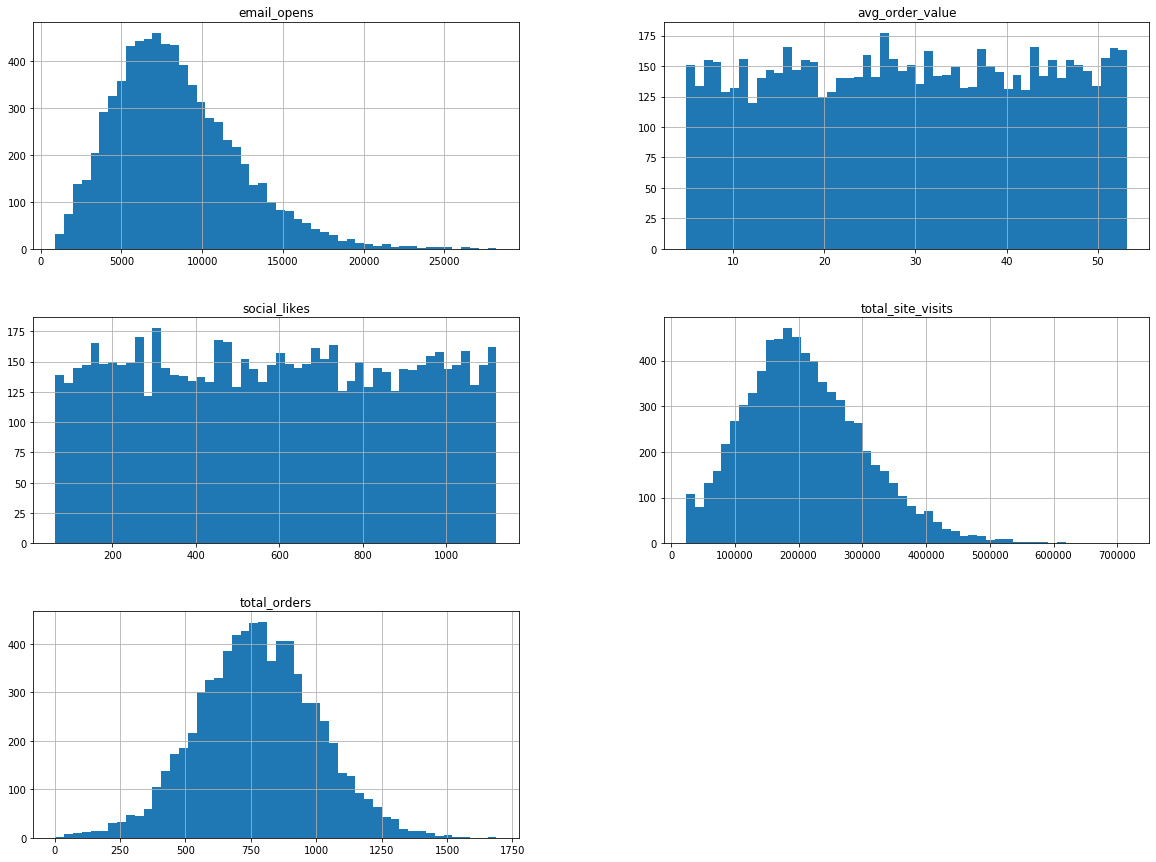

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
shazamazon_data.hist(bins=50, figsize=(20,15))
plt.show()

In [77]:
corr_matrix = shazamazon_data.corr()


In [78]:
corr_matrix['total_orders'].sort_values(ascending=False)

total_orders         1.000000
total_site_visits    0.887381
email_opens          0.813354
avg_order_value      0.011862
social_likes         0.002765
Name: total_orders, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc89e87e650>,
      dtype=object)

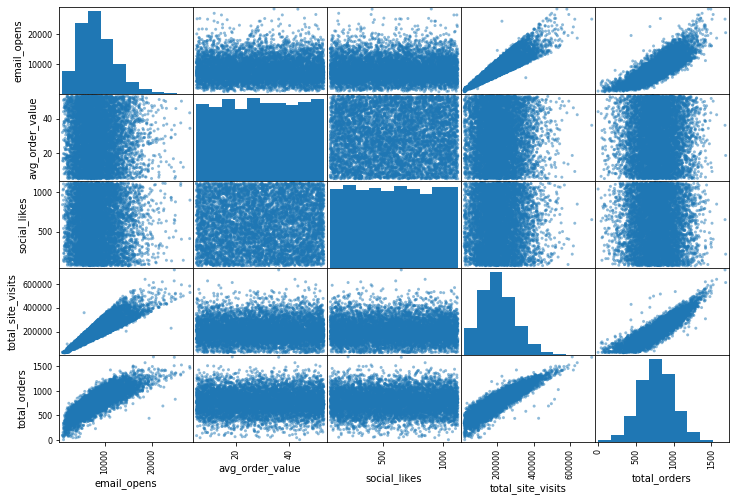

In [79]:
# from this it seems like avg_order_value and social_likes is random noise
from pandas.plotting import scatter_matrix

scatter_matrix(shazamazon_data, figsize=(12, 8))

## Transform data

In [80]:
shazamazon_data = shazamazon_data.drop(['avg_order_value','social_likes'],axis=1)


In [81]:
shazamazon_data.head()

,email_opens,total_site_visits,total_orders
date,,,
2020-01-01,3229,56075,464
2020-01-01,8421,159320,739
2020-01-01,8859,154371,737
2020-01-01,5740,111904,786
2020-01-01,5420,157213,712


## Train test split

In [82]:
from sklearn.model_selection import train_test_split


X = shazamazon_data.drop(['total_orders'],axis=1)
y = shazamazon_data['total_orders']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)

## Model Selection

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [85]:
ridge_reg = Ridge()
lasso_reg = Lasso()
svr_reg = SVR()
random_f = RandomForestRegressor()
grad = GradientBoostingRegressor()
lin_reg = LinearRegression()


In [86]:
for i in [svr_reg, random_f, grad,lin_reg,ridge_reg,lasso_reg]:
    print(i)
    scores = cross_val_score(i, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    scores = scores * -1
    print(scores)
    print(scores.mean())
    print(scores.std())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
[17863.76002894 18056.53227334 15874.34783844 15381.19415558
 15992.51074414]
16633.669008089324
1103.9936236662986
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
[12216.50358406 12462.84311129 12287.40016421 12411.414698
 12491.53635829]
12373.939583169398
105.27334697026954
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_

In [87]:
lin_reg.fit(scaled_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
lin_reg.coef_

array([ 22.24555791, 187.10102737])

In [89]:
shazamazon_data.columns

Index(['email_opens', 'total_site_visits', 'total_orders'], dtype='object')

In [90]:
random_f.fit(scaled_X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [91]:
random_f.feature_importances_

array([0.12016283, 0.87983717])

## feature engineering 

In [102]:
shazamazon_data['total_site_visits_per_email'] = .6*shazamazon_data['total_site_visits'] + .4* shazamazon_data['email_opens']


In [103]:
shazamazon_data['log_total_site_visits'] = np.log(shazamazon_data['total_site_visits'])
shazamazon_data['log_email_opens'] = np.log(shazamazon_data['email_opens'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8a6bbee90>,
      dtype=object)

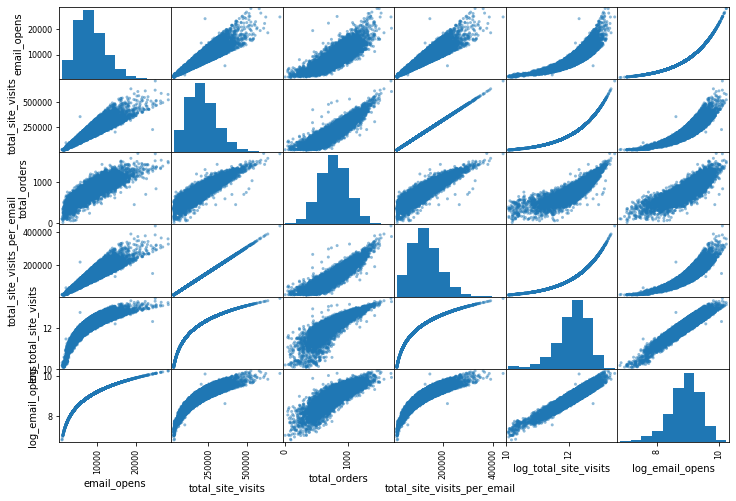

In [104]:
scatter_matrix(shazamazon_data, figsize=(12, 8))

In [107]:
shazamazon_data.corr()['total_orders'].sort_values()

email_opens                    0.813354
log_email_opens                0.823499
log_total_site_visits          0.853955
total_site_visits              0.887381
total_site_visits_per_email    0.887821
total_orders                   1.000000
Name: total_orders, dtype: float64

In [108]:
X = shazamazon_data[['total_site_visits_per_email','log_total_site_visits','log_email_opens']]
y = shazamazon_data['total_orders']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)

In [110]:
for i in [grad,lin_reg,ridge_reg,lasso_reg]:
    print(i)
    scores = cross_val_score(i, scaled_X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    scores = scores * -1
    print(scores)
    print(scores.mean())
    print(scores.std())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
[10970.44013389 10399.24589283 10493.20882754 10491.81963073
 10732.84277237]
10617.511451473285
208.2063393177518
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[11033.26433911 10308.940428   10648.76771585 10469.14821053
 10703.50937501]
10632.72601370037
243.84149514361727
Ridge(alpha=1.0, copy_X=

In [111]:
lin_reg.fit(scaled_X_train, y_train)
lin_reg.coef_

array([162.93279395,  15.21531011,  33.9008696 ])

## optimization
- I will optimize the lasso model as well as the GradientBoostingRegressor model and see what has better results

In [112]:
param_grid_grad = [
        {'alpha': [.9,.5,.1], 'learning_rate': [.1,.01,1],
        'n_estimators': [100,50,10]}
    ]

In [121]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(grad, param_grid_grad, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] alpha=0.9, learning_rate=0.1, n_estimators=100 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... alpha=0.9, learning_rate=0.1, n_estimators=100, total=   0.4s
[CV] alpha=0.9, learning_rate=0.1, n_estimators=100 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ... alpha=0.9, learning_rate=0.1, n_estimators=100, total=   0.4s
[CV] alpha=0.9, learning_rate=0.1, n_estimators=100 ..................
[CV] ... alpha=0.9, learning_rate=0.1, n_estimators=100, total=   0.4s
[CV] alpha=0.9, learning_rate=0.1, n_estimators=100 ..................
[CV] ... alpha=0.9, learning_rate=0.1, n_estimators=100, total=   0.4s
[CV] alpha=0.9, learning_rate=0.1, n_estimators=100 ..................
[CV] ... alpha=0.9, learning_rate=0.1, n_estimators=100, total=   0.4s
[CV] alpha=0.9, learning_rate=0.1, n_estimators=50 ...................
[CV] .... alpha=0.9, learning_rate=0.1, n_estimators=50, total=   0.2s
[CV] alpha=0.9, learning_rate=0.1, n_estimators=50 ...................
[CV] .... alpha=0.9, learning_rate=0.1, n_estimators=50, total=   0.2s
[CV] alpha=0.9, learning_rate=0.1, n_estimators=50 ...................
[CV] .... alpha=0.9, learning_rate=0.1, n_estimators=50, total=   0.2s
[CV] alpha=0.9, learning_rate=0.1, n_estimators=50 ...................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   28.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...nge=None,
                   

In [122]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

102.85731110378325

In [123]:
-negative_mse

10579.626447500454

In [124]:
grid_search.best_params_


{'alpha': 0.5, 'learning_rate': 0.1, 'n_estimators': 50}

In [116]:
param_grid_lasso = [
        {'alpha': [.01,.1,.5,1], 'max_iter': [10,50,100,150,1000]}
    ]

In [117]:
grid_search = GridSearchCV(lasso_reg, param_grid_lasso, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] alpha=0.01, max_iter=10 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22825456.327531967, tolerance: 23579.53048631603
  positive)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23199536.84899743, tolerance: 23683.519810837886
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22995493.682824932, tolerance: 23661.3571795082
  positive)
/opt/anaconda3/lib/python3.7/site-packa

[CV] .......................... alpha=0.01, max_iter=10, total=   0.2s
[CV] alpha=0.01, max_iter=10 .........................................
[CV] .......................... alpha=0.01, max_iter=10, total=   0.0s
[CV] alpha=0.01, max_iter=10 .........................................
[CV] .......................... alpha=0.01, max_iter=10, total=   0.0s
[CV] alpha=0.01, max_iter=10 .........................................
[CV] .......................... alpha=0.01, max_iter=10, total=   0.0s
[CV] alpha=0.01, max_iter=10 .........................................
[CV] .......................... alpha=0.01, max_iter=10, total=   0.0s
[CV] alpha=0.01, max_iter=50 .........................................
[CV] .......................... alpha=0.01, max_iter=50, total=   0.0s
[CV] alpha=0.01, max_iter=50 .........................................
[CV] .......................... alpha=0.01, max_iter=50, total=   0.0s
[CV] alpha=0.01, max_iter=50 .........................................
[CV] .

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20082952.059015997, tolerance: 23579.53048631603
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20462942.133734003, tolerance: 23683.519810837886
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20094860.55794634, tolerance: 23661.3571795082
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

[CV] .......................... alpha=0.1, max_iter=100, total=   0.0s
[CV] alpha=0.1, max_iter=100 .........................................
[CV] .......................... alpha=0.1, max_iter=100, total=   0.0s
[CV] alpha=0.1, max_iter=100 .........................................
[CV] .......................... alpha=0.1, max_iter=100, total=   0.0s
[CV] alpha=0.1, max_iter=150 .........................................
[CV] .......................... alpha=0.1, max_iter=150, total=   0.0s
[CV] alpha=0.1, max_iter=150 .........................................
[CV] .......................... alpha=0.1, max_iter=150, total=   0.0s
[CV] alpha=0.1, max_iter=150 .........................................
[CV] .......................... alpha=0.1, max_iter=150, total=   0.0s
[CV] alpha=0.1, max_iter=150 .........................................
[CV] .......................... alpha=0.1, max_iter=150, total=   0.0s
[CV] alpha=0.1, max_iter=150 .........................................
[CV] .

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6398565.168668482, tolerance: 23579.53048631603
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6828488.178108554, tolerance: 23683.519810837886
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5659624.280966047, tolerance: 23661.3571795082
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

[CV] ........................... alpha=0.5, max_iter=50, total=   0.0s
[CV] alpha=0.5, max_iter=50 ..........................................
[CV] ........................... alpha=0.5, max_iter=50, total=   0.0s
[CV] alpha=0.5, max_iter=50 ..........................................
[CV] ........................... alpha=0.5, max_iter=50, total=   0.0s
[CV] alpha=0.5, max_iter=50 ..........................................
[CV] ........................... alpha=0.5, max_iter=50, total=   0.0s
[CV] alpha=0.5, max_iter=50 ..........................................
[CV] ........................... alpha=0.5, max_iter=50, total=   0.0s
[CV] alpha=0.5, max_iter=100 .........................................
[CV] .......................... alpha=0.5, max_iter=100, total=   0.0s
[CV] alpha=0.5, max_iter=100 .........................................
[CV] .......................... alpha=0.5, max_iter=100, total=   0.0s
[CV] alpha=0.5, max_iter=100 .........................................
[CV] .

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1115563.1406301484, tolerance: 23579.53048631603
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1220482.1417875886, tolerance: 23683.519810837886
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1146332.9566278532, tolerance: 23661.3571795082
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.01, 0.1, 0.5, 1],
                          'max_iter': [10, 50, 100, 150, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=2)

In [118]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

103.11511157331658

In [119]:
-negative_mse

10632.726234777529

In [140]:
fianl_model = GradientBoostingRegressor(alpha=.5,learning_rate= 0.1, n_estimators = 50)


In [141]:
fianl_model.fit(scaled_X_train, y_train)

GradientBoostingRegressor(alpha=0.5, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Test

In [142]:
scaled_X_test = scaler.transform(X_test)

In [143]:
pred = fianl_model.predict(scaled_X_test)

In [144]:
from sklearn.metrics import mean_squared_error

In [145]:
mean_squared_error(y_test,pred)

11390.974443286812

In [146]:
np.sqrt(mean_squared_error(y_test,pred))

106.72850810953375

In [149]:
email_opens = 10449
total_site_visits = 282887


In [150]:
total_site_visits_per_email = .6*total_site_visits + .4*email_opens


In [159]:
scaled_test = scaler.transform(np.array([total_site_visits_per_email,np.log(total_site_visits),
np.log(email_opens)]).reshape(1, -1))

In [160]:
scaled_test

array([[0.77256805, 0.80017902, 0.66644112]])

In [161]:
fianl_model.predict(scaled_test)

array([953.9285402])